<a href="https://colab.research.google.com/github/paraxioms/NotebookStored/blob/main/Assignment1_DogBreedDataClusteringAndEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 - Task 1 - Dog Breed Data Clustering and EDA 

We have combined the code and report into the following notebook.

## Subtask 1 - What is (simple) K-Means clustering

Clustering is the task of grouping similar data, such that data in the same group is more similar to each other than data in other groups. We refer to these groups as clusters. K-Means is a type of clustering algorithm which labels each data point as belonging to a specific cluster. Clustering is a unsupervised learning task, where no target is given.

The K-Means algorithm requires the data (X) and the number of clusters (k) as input and outputs a label assigning each data point to a numbered cluster. The algorithm is comprised of the following steps:

1. Assign the positions of the initial centroids. The centroid represents the center of the cluster. There are many ways of assigning these initial centroids, but in simple K-Means it is done randomly. However other K-Means algorithms such as K-Means++ employ more advanced techniques.
2. Next the assignment step takes places. In this step each data point is assigned to a cluster, this is decided based on which centroid the data point is closest to. To calculate which centroid the cluster is closest to the euclidean distance between the point, x and every centroid, c is calculated and the centroid closest to the point is the cluster that the point is assigned to. The euclidean distance, $D$ between the point $X_{i}$ and centroid $c_{j}$ is defined as
$$D(X_{i},c_{j})^{2} = \sum_{k=1}^{p}(X_{ik}-c_{jk})^{2}$$
3. Next the update step takes place. In this step the centroid for each cluster is updated by setting it to the mean of all points assigned to that cluster in the previous step.
4. Repeat steps 2 and 3 until either no cluster assignments change or a predefined number of iterations has taken place.

The objective of K-Means is to minimise the within-cluster sum of squares (the total distance between all points and its clusters centroid). The objective function $J(c)$ is given below, where $c_{j}$ is the jth centroid and $x_{i}$ is the ith data point. 
$$J(c) = \sum_{j=1}^{k}\sum_{x_{i}\rightarrow{c_j}} \Vert x_{i}-c_{j} \Vert^{2} $$

There is some debate on K-Means vs EM (Estimation Maximisation). There are 2 steps in EM, the first step estimation, attempts to estimate missing variables, the second maximimisation, maximises the parameters to best explain the data. EM is most often applied with a gausian mixture model (GMM). A GMM estimates the mean and standard deviation for each probability distribution present in the data. K-Means and GMM models can both be used for clustering tasks, GMMs are a form of soft clustering where the probability that a point belongs to a cluster is calculated rather than definitively assiging each point to a cluster as done with K-Means.

K-Means is equivalent to the expectation-maximisation algorithm with a small, all-equal diagonal covariance matrix (SK-Learn). 

## Subtask 2 - Description Of The Dataset

We begining by importing the standard libraries, as well as the modelling modules that we will make use of later.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

We are using a jupyer notebook for this part of the assignment, we have the data saved as the file "DMV_CS551G_Assessment1_Task1_dataset.csv" in the same work space that the jupyter notebook is running in. This code will need to be changed depending on where the csv file is saved. We use the pandas function read_csv to read the data.

In [ ]:
inputFile = "DMV_CS551G_Assessment1_Task1_dataset.csv"
df = pd.read_csv(inputFile)

We get the first 5 rows of data:

In [ ]:
df.head()

,height,tail length,leg length,nose circumference
0,5.151,3.535,1.414,0.202
1,4.949,3.030,1.414,0.202
2,4.747,3.232,1.313,0.202
3,4.646,3.131,1.515,0.202
4,5.050,3.636,1.414,0.202


A more detailed description of the data is given below, there are 300 rows of data in total.

In [ ]:
df.describe()

,height,tail length,leg length,nose circumference
count,300.000000,300.000000,300.00000,300.000000
mean,5.930983,3.103193,3.81437,1.217323
std,0.839601,0.441935,1.78890,0.772409
min,4.343000,2.020000,1.01000,0.101000
25%,5.202000,2.828000,1.61600,0.305250
50%,5.858000,3.060000,4.41500,1.326000
75%,6.528000,3.366000,5.20200,1.836000
max,8.058000,4.488000,7.03800,2.550000


Further information including the data types of each column is given below

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
height                300 non-null float64
tail length           300 non-null float64
leg length            300 non-null float64
nose circumference    300 non-null float64
dtypes: float64(4)
memory usage: 9.5 KB


We notice from above that there are no missing values, we summarise this in the table below:

In [ ]:
missing = df.isnull().sum()
missing_data = pd.concat([missing], axis=1, keys=['Missing Values'])
missing_data

,Missing Values
height,0
tail length,0
leg length,0
nose circumference,0


## Subtask 3 - EDA

We emply visualisation techniques to get an initial understanding of the data. We summarise are findings at the end of this section.

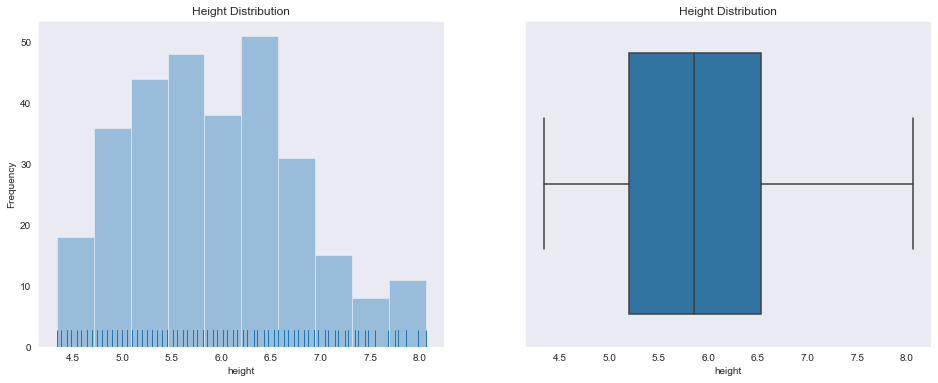

In [ ]:
sns.set_style("dark")
sns.set_color_codes(palette='deep')
fig, saxis = plt.subplots(1, 2,figsize=(16,6))
saxis[0].set(xlabel = 'Height',ylabel='Frequency',title="Height Distribution")
saxis[1].set(xlabel = 'Height', title="Height Distribution")
sns.distplot(df.height, kde=False,  bins = 10, rug = True, ax=saxis[0]);
sns.boxplot(df.height, ax=saxis[1]);

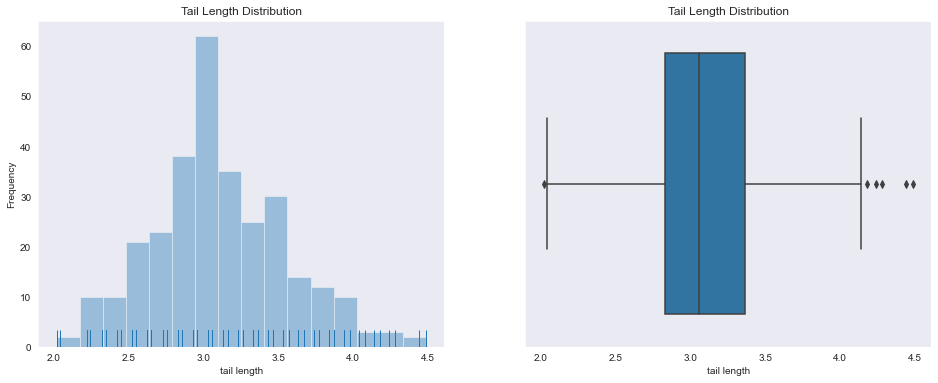

In [ ]:
fig, saxis = plt.subplots(1, 2,figsize=(16,6))
saxis[0].set(ylabel='Frequency',title="Tail Length Distribution")
saxis[1].set(title="Tail Length Distribution")
sns.distplot(df['tail length'], kde=False, rug = True, ax=saxis[0]);
sns.boxplot(df['tail length'], ax=saxis[1]);

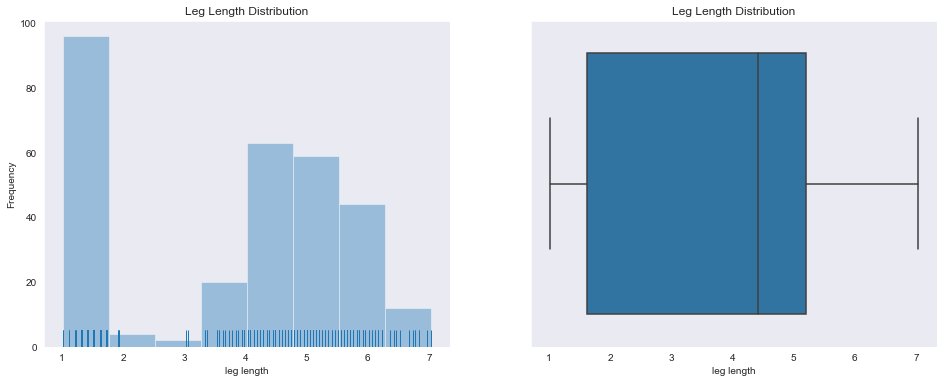

In [ ]:
fig, saxis = plt.subplots(1, 2,figsize=(16,6))
saxis[0].set(ylabel='Frequency',title="Leg Length Distribution")
saxis[1].set(title="Leg Length Distribution")
sns.distplot(df['leg length'], kde=False, bins = 8, rug = True, ax = saxis[0]);
sns.boxplot(df['leg length'], ax=saxis[1]);

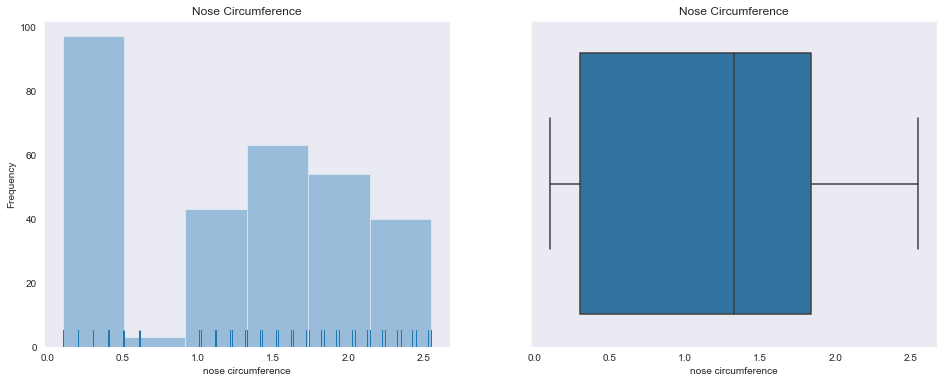

In [ ]:
fig, saxis = plt.subplots(1, 2,figsize=(16,6))
saxis[0].set(ylabel='Frequency', title="Nose Circumference")
saxis[1].set(title="Nose Circumference")
sns.distplot(df['nose circumference'], kde=False, rug = True, ax=saxis[0]);
sns.boxplot(df['nose circumference'], ax=saxis[1]);

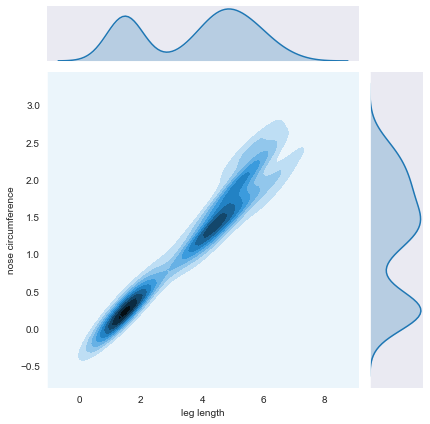

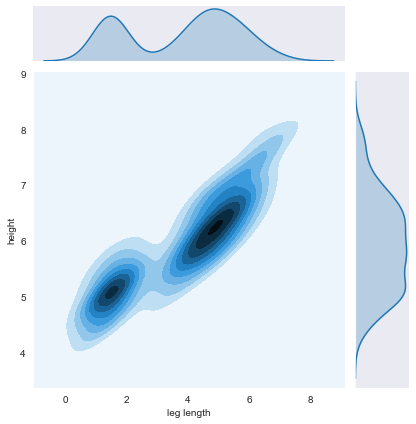

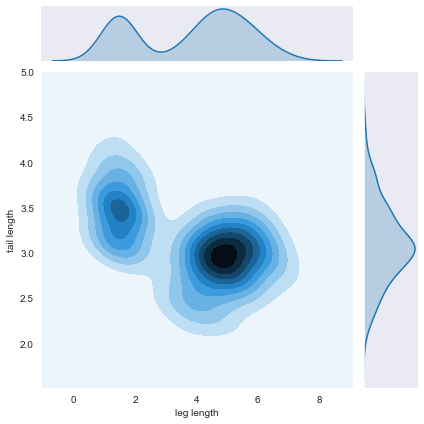

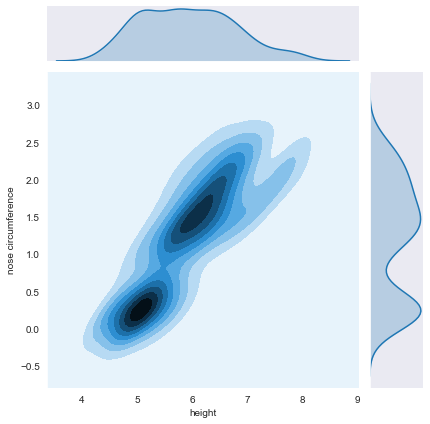

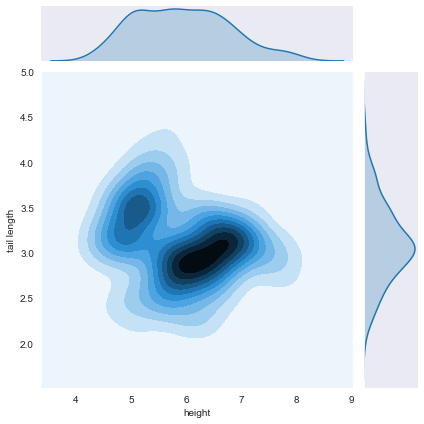

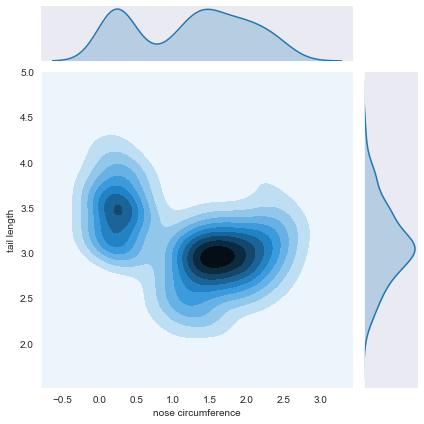

In [ ]:
sns.jointplot(x=df['leg length'], y=df['nose circumference'], kind="kde")
sns.jointplot(x=df['leg length'], y=df['height'], kind="kde")
sns.jointplot(x=df['leg length'], y=df['tail length'], kind="kde")
sns.jointplot(x=df['height'], y=df['nose circumference'], kind="kde")
sns.jointplot(x=df['height'], y=df['tail length'], kind="kde")
sns.jointplot(x=df['nose circumference'], y=df['tail length'], kind="kde")

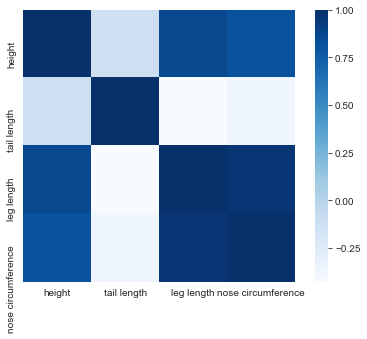

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(corrmat, vmax=1, square=True, cmap="Blues");

There are several important results we can draw from the visualisations above. Firstly it is clear that different classes are present in the data, this is particularly evident from the joint density plots, where atleast 2 classes can be clearly identified. This can also be seen in the singular density plots for nose circumference and leg length, where the data is clearly not normally distributed which we would expect from data of this type if collected randomly from a singular dog breed. 

We also notice that tail length is a particular important feature as it is not highly correlated with any others. Whereas height, leg length and nose circumference are all relatively highly correlated.

## Subtask 4 - Clustering

### K-Means

When using K-Means it is important to first standardise the data. We also perform PCA purely for easier data visualisation.

In [ ]:
standardised = StandardScaler()
s = standardised.fit_transform(df)

pca = PCA(n_components=2)
pca.fit(s)
pc = pca.transform(s)

print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[0.72937245 0.22876134]
0.9581337893037895


### K-Means - Implemented From Scratch

We implement K-Means from scratch, using the three functions below. The parameter iterations provide the number of times to run the algorithm, consisting of the assignment step and update step.

We could definitely improve this further, for example by running the algorithm several times with different random initialisations and taking the best performing run as the final clustering.

In [ ]:
def compute_euclidean_distance(vec_1, vec_2):
    zippedVector = zip(vec_1,vec_2)
    distance = 0
    for i in zippedVector:
        distance = distance + (i[1]-i[0])**2
    distance = distance**0.5
    return distance

In [ ]:
def initialise_centroids(dataset, k, random_state):
    randomNo = np.random.RandomState(random_state)
    i = randomNo.permutation(len(df))[:k]
    #centers = dataset.loc[i].to_numpy()
    centers = dataset[i]
    return centers

In [ ]:
def kmeans(dataset, k, iterations, random_state=42):
    initialCenters = initialise_centroids(dataset, k, random_state)
    #X = dataset.to_numpy()
    X = dataset
    currentCentroids = initialCenters.copy()
    labels = np.zeros(len(X))
    for i in range(iterations):
        oldCentroids = currentCentroids
        for n,point in enumerate(X):
            labels[n] = np.argmin([compute_euclidean_distance(point,centroid) for centroid in currentCentroids])
        currentCentroids = np.array([np.mean(X[labels == c], axis=0) for c in range(0,k)])
        if np.all(oldCentroids == currentCentroids):
            break
    return currentCentroids, labels

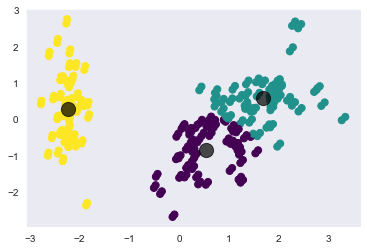

In [ ]:
centers, labels = kmeans(s,3,100,42)
pcCenters = pca.transform(centers) #Used to plot the centers

plt.scatter(pc[:, 0], pc[:, 1], c=labels, s=50, cmap='viridis');
plt.scatter(pcCenters[:, 0], pcCenters[:, 1], c='black', s=200, alpha=0.7);

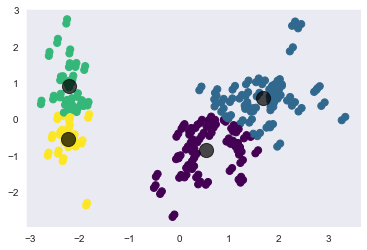

In [ ]:
centers, labels = kmeans(s,4,100,42)
pcCenters = pca.transform(centers) #Used to plot the centers
plt.scatter(pc[:, 0], pc[:, 1], c=labels, s=50, cmap='viridis');
plt.scatter(pcCenters[:, 0], pcCenters[:, 1], c='black', s=200, alpha=0.7);

### K Means - Using SK-Learn

We also implement K-Means using the SK-Learn library to compare and verify our own results. There are several parameters that we choose and adjust in order to do this.
* Firstly the number of clusters, k, which we wish to try will be setting this to 3 or 4, as specified by the assignment specification. 
* We also choose the implementation method, which is how the initial cluster centroids are selected at the start of the algorithm. We have chosen the k-means++ initialisation method, although as we are running multiple iterations this wont make much of a difference and we could choose a random initialisation with the same results. 
* We choose the maximumum number of iterations to run, which is the maximum number of assign-update cycles that are completed before deciding on the final data point labels. As we dont have much data choosing a high number of iterations is not a problem and it will probably terminate before it reaches this point anyway (as the data labels will stop changing in each iteration), we set it to 100 iterations although this is probably overkill. 
* We set the number of initialisations to 30, this is the number of times we implement the algorithm, from choosing the initial cluster centroids all the way to deciding on the final labels for each data point. Of these 30 initialisation the one that minimises the objective function the most is the final labels outputted. This is necessary because of the randomness involved in selecting the initial cluster centroid which means that in a single run of K-Means the global optimum is not always found.
* We also set a random_state, this is just done for reproducability and is good practice, in this case any random state can be used with almost identical results.

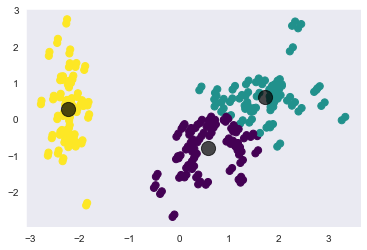

In [ ]:
kmeans1 = KMeans(n_clusters=3, init = 'k-means++', n_init = 30, max_iter=100, random_state = 18)
kmeans1.fit(s)

kMeans1Centers = pca.transform(kmeans1.cluster_centers_)

plt.scatter(pc[:, 0], pc[:, 1], c=kmeans1.labels_, s=50, cmap='viridis');
plt.scatter(kMeans1Centers[:, 0], kMeans1Centers[:, 1], c='black', s=200, alpha=0.7);


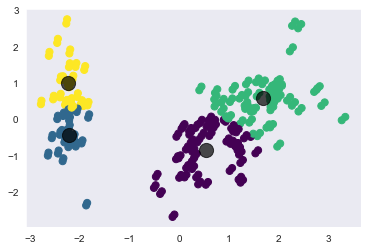

In [ ]:
kmeans1 = KMeans(n_clusters=4, init = 'k-means++', n_init = 30, max_iter=100, random_state = 18)
kmeans1.fit(s)

kMeans1Centers = pca.transform(kmeans1.cluster_centers_)

plt.scatter(pc[:, 0], pc[:, 1], c=kmeans1.labels_, s=50, cmap='viridis');
plt.scatter(kMeans1Centers[:, 0], kMeans1Centers[:, 1], c='black', s=200, alpha=0.7);

### Estimation Maximisation (using GMM)

We use a Gaussian Mixture Model to cluster the data as well. We do not need to standardise the data for GMMs, but we still perform PCA for easier data visualisation.

In [ ]:
pca2 = PCA(n_components=2)
pca2.fit(df.to_numpy())
pc2 = pca2.transform(df.to_numpy())

We implement the Gaussian Mixture model using SK-Learn, we describe the parameters and our choices below:
* n_components is the number of mixtures, equivalent to the k values in k-means. We show the results with 3 and 4 mixtures as defined by the assignment specification.
* covariance_type represents the covariance type used, we use full where each component has its own general covariance matrix.
* max_iter is the number of estimation-maximisation iterations to perform before assigning the final labels. As there is little data there is no real harm in choosing a high number, we choose 100.
* n_init is the number of initialisations to carry out, the results from the best performing initialisation is chosen as the output. We choose 30 initialisations as there is little data so we can afford to have a high number. 

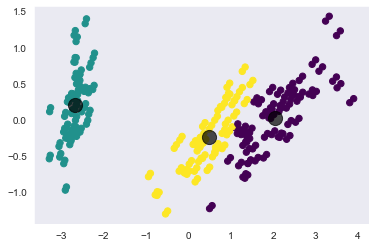

In [ ]:
gmm = GaussianMixture(n_components=3, covariance_type='full', max_iter=100, n_init=30, random_state=42)
gmm.fit(df.to_numpy())
labelsGMM = gmm.predict(df.to_numpy())

gmmCenters = pca2.transform(gmm.means_)

plt.scatter(pc2[:, 0], pc2[:, 1], c=labelsGMM, s=40, cmap='viridis');
plt.scatter(gmmCenters[:, 0], gmmCenters[:, 1], c='black', s=200, alpha=0.7);
#probs = gmm.predict_proba(X)

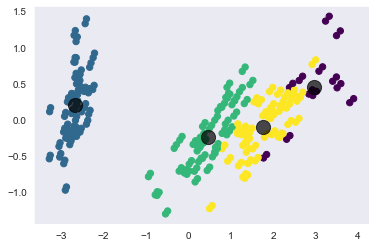

In [ ]:
gmm = GaussianMixture(n_components=4, covariance_type='full', max_iter=500,n_init=50, random_state=42)
gmm.fit(df.to_numpy())
labelsGMM = gmm.predict(df.to_numpy())

gmmCenters = pca2.transform(gmm.means_)

plt.scatter(pc2[:, 0], pc2[:, 1], c=labelsGMM, s=40, cmap='viridis');
plt.scatter(gmmCenters[:, 0], gmmCenters[:, 1], c='black', s=200, alpha=0.7);

## Subtask 5 - Internal Validation Approach

In this subtask we evaluate the clustering performance of K-Means and EM. This will allow us to determine the number of dog breeds present in the data.

Note: Some of the required graphs for this subtask are given in subtask 4.

### Within Cluster Sum Of Squares Error (Inertia)

For K-Means the best evaluation metric is the within cluster sum of squares error, this is also the objective function of K-Means. We calculate the inertia for a range of k-values to determine the best choice of k. 

In [ ]:
def SSE(data, clusterCenters, labels):
    sse = 0
    for c in range(0,len(clusterCenters)):
        clusterTotal = 0
        clusterPoints = data[labels == c]
        for point in clusterPoints:
            clusterTotal = clusterTotal + compute_euclidean_distance(point,clusterCenters[c])**2 #Euclidean distance is sqrt(squared distance)
        sse = sse + clusterTotal
    return sse
#SSE(s,kmeans.cluster_centers_,kmeans.labels_)
#SSE(s,centers,labels)

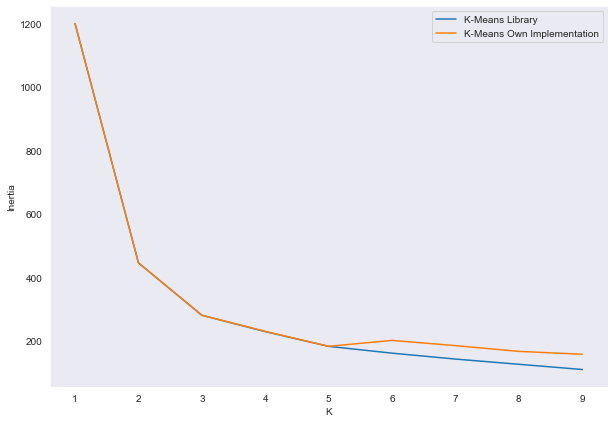

In [ ]:
def plotInertia(data, maxk, maxIteration):
    IKMeansLib = []
    IKMeans = []
    kvals = range(1,maxk)
    for k in kvals:
        kmeansLib = KMeans(n_clusters=k, init = 'k-means++', n_init = 50, max_iter=maxIteration, random_state = 42)
        kmeansLib.fit(data)
        IKMeansLib.append(kmeansLib.inertia_)
        centers1, labels1 = kmeans(data,k, iterations=maxIteration, random_state=43)
        IKMeans.append(SSE(data,centers1,labels1))
    fig, saxis = plt.subplots(1, 1,figsize=(10,7))
    saxis.set(xlabel="K", ylabel = "Inertia")
    sns.lineplot(x=kvals,y=IKMeansLib, label="K-Means Library")
    sns.lineplot(x=kvals,y=IKMeans, label="K-Means Own Implementation")
plotInertia(s,10,70)    

The above graph suggests that k=3 is the best choice, as although inertia is reduced with higher values of k, the difference is not significant enough to conclude that there are any more than 3 clusters.

### Bayesian information criterion

For our GMM, inertia is not a useful evaluation metric as the GMM does not try and maximise this, instead a better choice is the Bayesian information criterion (BIC). The lower the score the better.

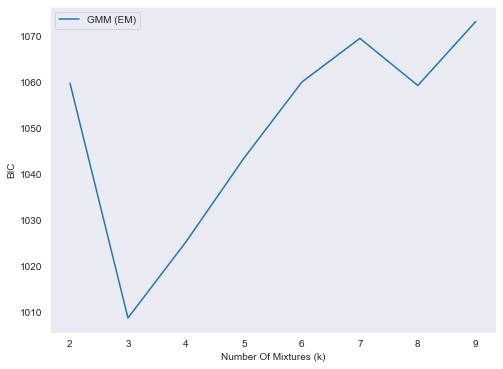

In [ ]:
def BICPlot(data, maxk, maxIteration):
    BICGMM = []
    kvals = range(2,maxk)
    for k in kvals:
        gmm = GaussianMixture(n_components=k, covariance_type='full', max_iter=maxIteration, n_init=50, random_state=9)
        gmm.fit(data)
        BICGMM.append(gmm.bic(data))
    fig, saxis = plt.subplots(1, 1,figsize=(8,6))
    saxis.set(xlabel="Number Of Mixtures (k)", ylabel = "BIC")
    sns.lineplot(x=kvals,y=BICGMM, label="GMM (EM)")
BICPlot(df.to_numpy(),10,80)    

From this we can clearly see that k=3 is the preferred choice, therefore it is likely that there are 3 breeds of dogs present in this data.

### Discussion of results

It seems highly likely that there are 3 dog breeds present in this data set, as our elbow plot for both K-Means and our GMM clearly suggests this. This is particularly clear for the GMM.

When looking at the clusters created for both the GMM and K-Means we see that one cluster is clearly and equally identified by both algorithms, the other two dog breeds are classified slightly differently by K-Means and GMM as these dog breeds clearly share similar features. In my opinion the clusters created by the GMM are more likely to be correct, due to the limitations of K-Means in dealing with non-identity covariances. 

### Performance achieved after each iteration

We plot the performance of K-Means and the GMM (EM) after each iteration. We plot this where x is the iteration step and y is the objective function, Intertia for K-Means and BIC for the GMM. 

In [ ]:
def iterationComparisionKMeans(data,k,maxIteration):
    allSSEKMeans = []
    allSSEKMeansOwn = []
    BICGmm = []
    iterations = range(2,maxIteration)
    for iteration in iterations:
        kmeansLib = KMeans(n_clusters=k, init = 'k-means++', n_init = 1, max_iter=iteration, random_state = 42)
        centers1, labels1 = kmeans(data,k, iterations=iteration, random_state=42)
        gmm = GaussianMixture(n_components=k, covariance_type='full', max_iter=iteration, n_init=1, random_state=11)
        kmeansLib.fit(data)
        gmm.fit(df.to_numpy())
        BICGmm.append(gmm.bic(df.to_numpy()))
        labelsGMM = gmm.predict(df.to_numpy())
        allSSEKMeans.append(SSE(data,kmeansLib.cluster_centers_,kmeansLib.labels_))
        allSSEKMeansOwn.append(SSE(data,centers1,labels1))
    fig, saxis = plt.subplots(2, 1,figsize=(16,12))
    sns.lineplot(x=iterations,y=allSSEKMeans, label="K-Means Library",ax = saxis[0])
    sns.lineplot(x=iterations,y=allSSEKMeansOwn, label="K-Means Own Implementation",ax = saxis[0])
    sns.lineplot(x=iterations,y=BICGmm, label="GMM (EM)",ax = saxis[1])
    saxis[0].set(xlabel='Iterations', ylabel='Sum Squared Error')
    #sns.lineplot(x=iterations,y=allSSEGmm, label="GMM (EM)",ax = saxis[0,1])
    saxis[1].set(xlabel='Iterations', ylabel='BIC')
    #sns.lineplot(x=iterations,y=allSSEKMeans, label="K-Means Library",ax = saxis[1,0])
    #saxis[1,0].set(xlabel='Iterations', ylabel='Sum Squared Error')
    #sns.lineplot(x=iterations,y=allSSEKMeansOwn, label="K-Means Own Implementation",ax = saxis[1,1]);
    #saxis[1,1].set(xlabel='Iterations', ylabel='Sum Squared Error');


We plot this first for when there is 3 clusters.

C:\Users\willi\Anaconda3\lib\site-packages\sklearn\mixture\base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\willi\Anaconda3\lib\site-packages\sklearn\mixture\base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\willi\Anaconda3\lib\site-packages\sklearn\mixture\base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\willi\Anaconda3\lib\site-packages\sklearn\mixture\base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


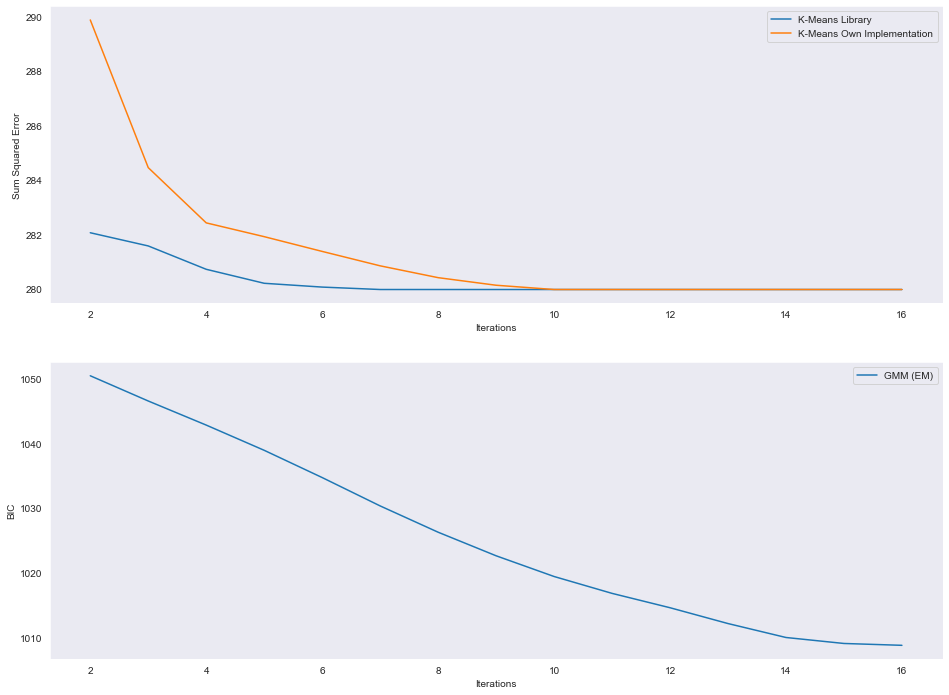

In [ ]:
iterationComparisionKMeans(s,3,17)

We do the same as above but for 4 clusters.

C:\Users\willi\Anaconda3\lib\site-packages\sklearn\mixture\base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\willi\Anaconda3\lib\site-packages\sklearn\mixture\base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\willi\Anaconda3\lib\site-packages\sklearn\mixture\base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\willi\Anaconda3\lib\site-packages\sklearn\mixture\base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


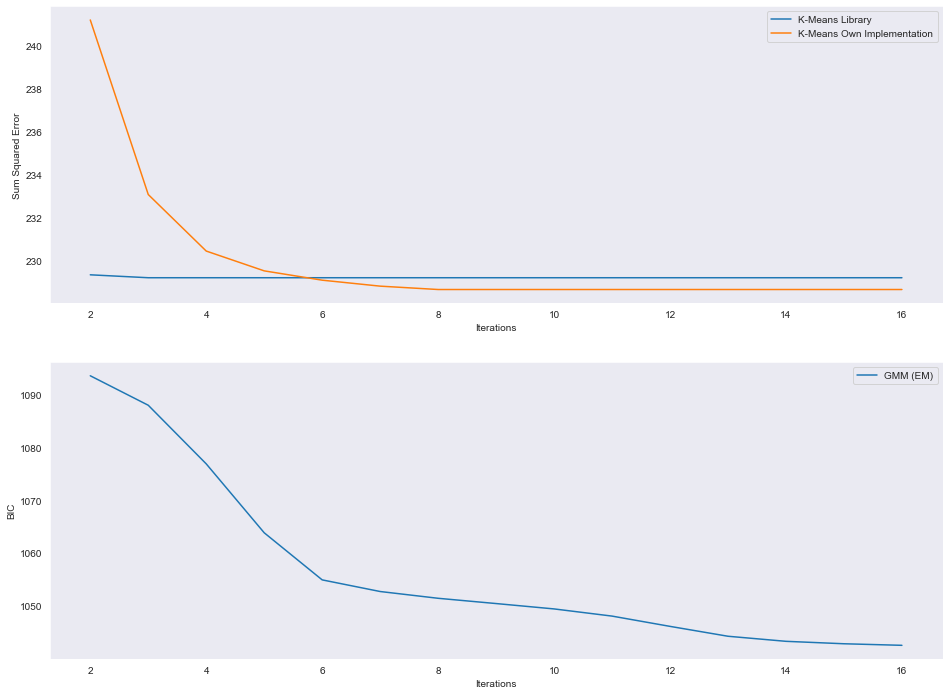

In [ ]:
iterationComparisionKMeans(s,4,17)

## Further Investigation

### Davies-Bouldin Index

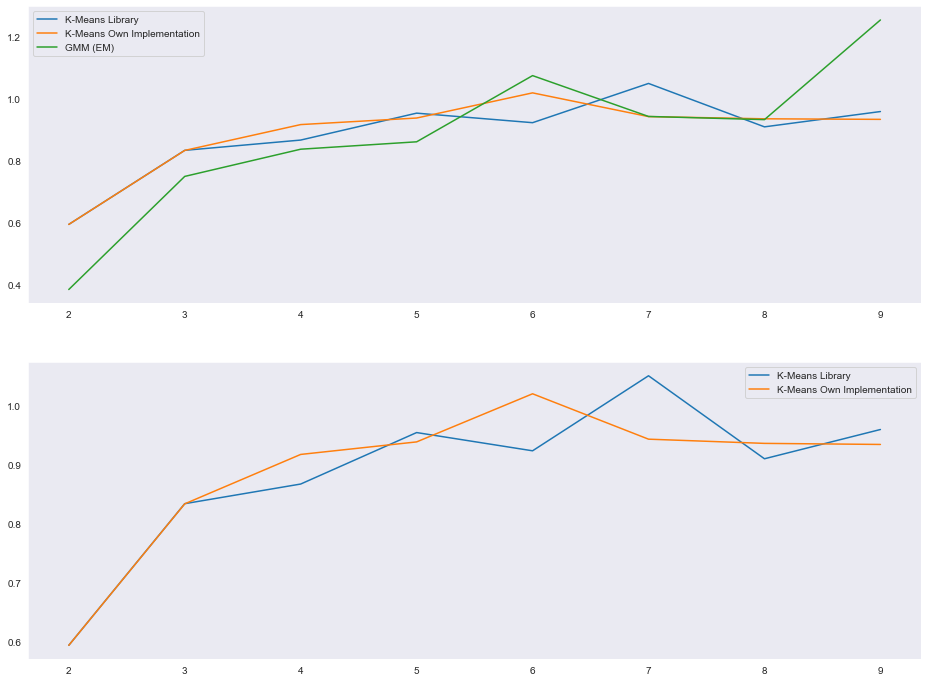

In [ ]:
def daviesBouldin(data, maxk, maxIteration):
    DBKMeansLib = []
    DBKMeans = []
    DBGMM = []
    kvals = range(2,maxk)
    for k in kvals:
        kmeansLib = KMeans(n_clusters=k, init = 'k-means++', n_init = 10, max_iter=maxIteration, random_state = 42)
        kmeansLib.fit(data)
        DBKMeansLib.append(davies_bouldin_score(data,kmeansLib.labels_))
        centers1, labels1 = kmeans(data,k, iterations=maxIteration, random_state=43)
        DBKMeans.append(davies_bouldin_score(data,labels1))
        gmm = GaussianMixture(n_components=k, covariance_type='full', max_iter=maxIteration, n_init=30, random_state=9)
        gmm.fit(df.to_numpy())
        labelsGMM = gmm.predict(df.to_numpy())
        DBGMM.append(davies_bouldin_score(df.to_numpy(),labelsGMM))
    fig, saxis = plt.subplots(2, 1,figsize=(16,12))
    sns.lineplot(x=kvals,y=DBKMeansLib, label="K-Means Library", ax = saxis[0])
    sns.lineplot(x=kvals,y=DBKMeans, label="K-Means Own Implementation", ax = saxis[0])
    sns.lineplot(x=kvals,y=DBGMM, label="GMM (EM)", ax = saxis[0])
    sns.lineplot(x=kvals,y=DBKMeansLib, label="K-Means Library", ax = saxis[1])
    sns.lineplot(x=kvals,y=DBKMeans, label="K-Means Own Implementation", ax = saxis[1])
daviesBouldin(s,10,50)    

### Silhoutte Scores

The silhoutte score takes into consideration both the mean intra-cluster distance (mean distance between a point and all other points in the cluster), and the mean nearest cluster distance (mean distance between a sample and all other points in the next closest cluster) for each point. This means it considers both how compact each cluster is and how well seperated each of the clusters are.

The higher the silhoutte score, the better. A score of 1 is the best possible score and a score of -1 is the worst score. 

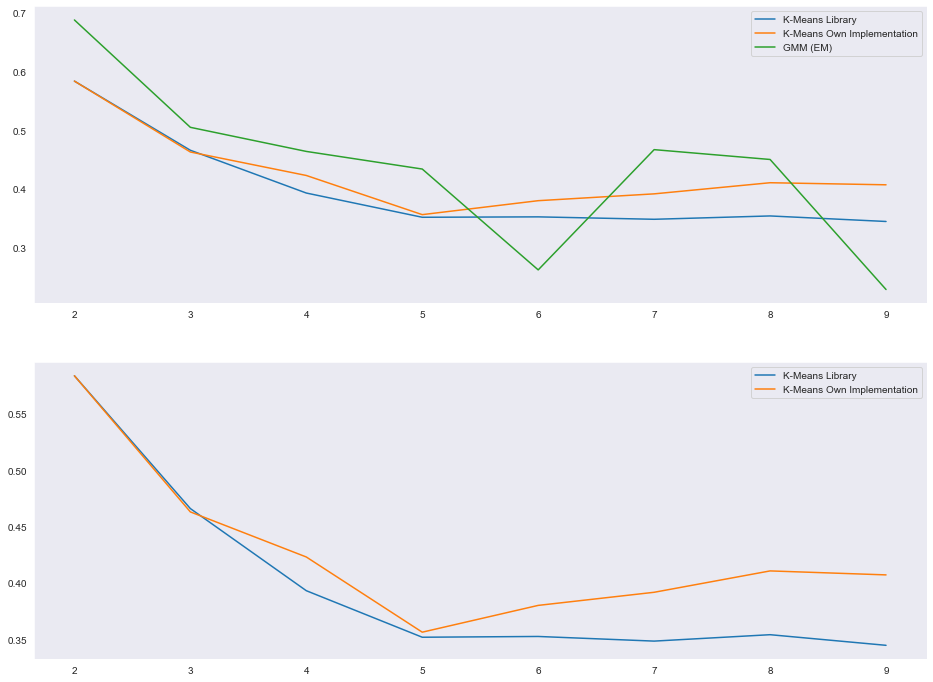

In [ ]:
def silhouttePlot(data, maxk, maxIteration):
    DBKMeansLib = []
    DBKMeans = []
    DBGMM = []
    kvals = range(2,maxk)
    for k in kvals:
        kmeansLib = KMeans(n_clusters=k, init = 'k-means++', n_init = 10, max_iter=maxIteration, random_state = 42)
        kmeansLib.fit(data)
        DBKMeansLib.append(silhouette_score(data,kmeansLib.labels_))
        centers1, labels1 = kmeans(data,k, iterations=maxIteration, random_state=43)
        DBKMeans.append(silhouette_score(data,labels1))
        gmm = GaussianMixture(n_components=k, covariance_type='full', max_iter=maxIteration, n_init=30, random_state=9)
        gmm.fit(df.to_numpy())
        labelsGMM = gmm.predict(df.to_numpy())
        DBGMM.append(silhouette_score(df.to_numpy(),labelsGMM))
    fig, saxis = plt.subplots(2, 1,figsize=(16,12))
    sns.lineplot(x=kvals,y=DBKMeansLib, label="K-Means Library", ax = saxis[0])
    sns.lineplot(x=kvals,y=DBKMeans, label="K-Means Own Implementation", ax = saxis[0])
    sns.lineplot(x=kvals,y=DBGMM, label="GMM (EM)", ax = saxis[0])
    sns.lineplot(x=kvals,y=DBKMeansLib, label="K-Means Library", ax = saxis[1])
    sns.lineplot(x=kvals,y=DBKMeans, label="K-Means Own Implementation", ax = saxis[1])
silhouttePlot(s,10,50) 